In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [155]:
file_path= "C:/Users/DELL/Desktop/Python case studies/Credit card/"

In [156]:
customer_acqusition= pd.read_csv(file_path+"Customer Acqusition.csv")
customer_acqusition.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [157]:
customer_acqusition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [230]:
#Checking for duplicate customers 

customer_acqusition['Customer'].duplicated().sum()

0

In [158]:
#Checking for duplicates in the customers table.

customer_acqusition.duplicated().sum()

0

In [159]:
spend= pd.read_csv(file_path+"spend.csv")
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [160]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [161]:
# Converting the month column in dateset from object to datetime.
spend['Month']= pd.to_datetime(spend.Month)

In [162]:
#Checking for duplicates in the spend table.

spend.duplicated().sum()

0

In [163]:
repayment= pd.read_csv(file_path+"Repayment.csv")
repayment.head()

,SL No:,Customer,Month,Amount
0,1,A1,12-Jan-04,495414.75
1,2,A1,03-Jan-04,245899.02
2,3,A1,15-Jan-04,259490.06
3,4,A1,25-Jan-04,437555.12
4,5,A1,17-Jan-05,165972.88


In [164]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SL No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.0+ KB


In [165]:
# Converting the month column in dateset from object to datetime.
spend['Month']= pd.to_datetime(spend.Month)

In [166]:
# Converting the month column in repayment dateset from object to datetime.
repayment['Month']= pd.to_datetime(repayment.Month)

In [167]:
#Checking for duplicates in the repayment table.


repayment.duplicated().sum()

0

### 1. In the above dataset,
###  a. In case age is less than 18, replace it with mean of age values.

In [168]:
# Checking for customers with age less than 18 years

customer_acqusition[customer_acqusition.Age<18]

,No,Customer,Age,City,Product,Limit,Company,Segment
13,14,A14,16,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,41,A41,13,COCHIN,Platimum,500000.0,C23,Govt
62,63,A63,15,BANGALORE,Gold,500000.0,C25,Self Employed
67,68,A68,12,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,70,A70,16,BOMBAY,Platimum,10001.0,C32,Self Employed
89,90,A90,16,COCHIN,Gold,500000.0,C13,Govt


In [169]:
# Mean age of the customers

customer_acqusition.Age.mean()

46.49

In [170]:
#Replacing the customers' age with age<18 with mean age of the dataset.  

customer_acqusition['Age']= pd.Series(np.where(customer_acqusition.Age<18, customer_acqusition.Age.mean(), customer_acqusition.Age ).astype(int))

In [171]:
# Checking for customers with age less than 18 years

customer_acqusition[customer_acqusition.Age<18]

,No,Customer,Age,City,Product,Limit,Company,Segment


In [172]:
print('Implies all customers\' ages with age less than 18 have been replaced with the mean age.')

Implies all customers' ages with age less than 18 have been replaced with the mean age.


###  b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
### (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [173]:
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73
1496,1497,A68,2006-03-25,BUS TICKET,204971.10
1497,1498,A69,2006-03-31,BUS TICKET,50449.44
1498,1499,A70,2006-03-23,BUS TICKET,80593.94


In [174]:
spend.dtypes

Sl No:               int64
Customer            object
Month       datetime64[ns]
Type                object
Amount             float64
dtype: object

In [175]:
q1_df = pd.merge(left=spend, right= customer_acqusition, how= 'left', on='Customer', indicator=True )

In [176]:
q1_df[q1_df.Amount> q1_df.Limit]

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,_merge
7,8,A8,2004-02-05,BIKE,155562.58,8,67,PATNA,Silver,100002.0,C8,Salaried_Pvt,both
18,19,A19,2005-04-04,FOOD,441442.26,19,27,BANGALORE,Platimum,10000.0,C19,Salaried_Pvt,both
19,20,A20,2006-04-30,JEWELLERY,356733.48,20,27,CALCUTTA,Platimum,10001.0,C20,Govt,both
20,21,A21,2004-04-25,PETRO,190011.63,21,57,COCHIN,Platimum,10002.0,C21,Normal Salary,both
21,22,A22,2006-04-19,CLOTHES,423672.50,22,27,BOMBAY,Silver,100000.0,C22,Self Employed,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1486,A59,2004-01-15,FOOD,181115.20,59,74,BANGALORE,Silver,100003.0,C21,Normal Salary,both
1496,1497,A68,2006-03-25,BUS TICKET,204971.10,68,46,TRIVANDRUM,Silver,100000.0,C30,Self Employed,both
1497,1498,A69,2006-03-31,BUS TICKET,50449.44,69,33,CALCUTTA,Platimum,10000.0,C31,Self Employed,both
1498,1499,A70,2006-03-23,BUS TICKET,80593.94,70,46,BOMBAY,Platimum,10001.0,C32,Self Employed,both


In [177]:
spend['Amount']=pd.Series(np.where(q1_df.Amount> q1_df.Limit, (1/2)*q1_df.Limit, q1_df.Amount ))

In [178]:
#Also changing the amount in the q1_df dataframe

q1_df['Amount']=pd.Series(np.where(q1_df.Amount> q1_df.Limit, (1/2)*q1_df.Limit, q1_df.Amount ))

In [179]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07


###  c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [180]:
q1_df2= pd.merge(left=repayment, right= customer_acqusition, how= 'left', on='Customer', indicator=True )

In [181]:
q1_df2[q1_df2.Amount> q1_df2.Limit]

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment,_merge
7,8,A8,2004-02-05,156913.59,8,67,PATNA,Silver,100002.0,C8,Salaried_Pvt,both
8,9,A9,2005-02-28,417294.81,9,79,CHENNAI,Silver,100003.0,C9,Govt,both
17,18,A18,2006-03-05,213352.06,18,34,BANGALORE,Silver,100000.0,C18,Salaried_MNC,both
18,19,A19,2005-04-04,347826.27,19,27,BANGALORE,Platimum,10000.0,C19,Salaried_Pvt,both
19,20,A20,2006-04-30,471099.22,20,27,CALCUTTA,Platimum,10001.0,C20,Govt,both
...,...,...,...,...,...,...,...,...,...,...,...,...
1483,1484,A57,2004-03-19,207786.09,57,37,TRIVANDRUM,Silver,100001.0,C19,Normal Salary,both
1496,1497,A68,2006-05-10,319836.49,68,46,TRIVANDRUM,Silver,100000.0,C30,Self Employed,both
1497,1498,A69,2006-07-11,247628.45,69,33,CALCUTTA,Platimum,10000.0,C31,Self Employed,both
1498,1499,A70,2005-08-12,454016.51,70,46,BOMBAY,Platimum,10001.0,C32,Self Employed,both


In [182]:
repayment['Amount']=pd.Series(np.where(q1_df2.Amount> q1_df2.Limit, q1_df.Limit, q1_df.Amount ))

In [183]:
#Also changing the amount in q1_df2 dataframe.

q1_df2['Amount']=pd.Series(np.where(q1_df2.Amount> q1_df2.Limit, q1_df.Limit, q1_df.Amount ))

In [184]:
repayment.head()

,SL No:,Customer,Month,Amount
0,1,A1,2004-01-12,485470.80
1,2,A1,2004-01-03,410556.13
2,3,A1,2004-01-15,23740.46
3,4,A1,2004-01-25,484342.47
4,5,A1,2005-01-17,369694.07


### 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?

In [186]:
customer_acqusition.Customer.nunique()

100

### b. How many distinct categories exist?

In [187]:
print(f"{customer_acqusition.Product.nunique()} distinct categories exist which are:\n" )
print(customer_acqusition.Product.unique()) 

3 distinct categories exist which are:

['Gold' 'Silver' 'Platimum']


###  c. What is the average monthly spend by customers?

In [233]:
round((spend.groupby([spend.Month.dt.month_name(),spend.Customer] )['Amount'].sum()).mean(),2)

380244.09

###  d. What is the average monthly repayment by customers?

In [238]:
round((repayment.groupby([repayment.Month.dt.month_name(),repayment.Customer])['Amount'].sum()).mean(),2)

429216.46

###  e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
### '– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [259]:
repayment['year']=pd.Series(repayment.Month.dt.year)
repayment['Month_no']=pd.Series(repayment.Month.dt.month)
repayment['Month_name']=pd.Series(repayment.Month.dt.month_name())

In [262]:
spend['year']=pd.Series(spend.Month.dt.year)
spend['Month_no']=pd.Series(spend.Month.dt.month)
spend['Month_name']=pd.Series(spend.Month.dt.month_name())

In [274]:
df_repayment.head()

,year,Month_no,Month_name,Amount
0,2004,1,January,48095890.83
1,2004,2,February,2857958.67
2,2004,3,March,2915017.80
3,2004,4,April,4119066.86
4,2004,5,May,4182803.20


In [268]:
df_repayment= repayment.groupby(['year','Month_no','Month_name'])['Amount'].sum().reset_index()

In [270]:
df_spend= spend.groupby(['year','Month_no','Month_name'])['Amount'].sum().reset_index()

In [276]:
df_repay_spend= pd.merge( left = df_repayment, right = df_spend, 
             how = 'inner', left_on = ['year', 'Month_no', 'Month_name'], right_on =['year', 'Month_no', 'Month_name'], indicator=True, suffixes=['_repayment', '_spend'])

In [279]:
df_repay_spend.head()

,year,Month_no,Month_name,Amount_repayment,Amount_spend,_merge,Profit
0,2004,1,January,48095890.83,44279811.96,both,3816078.87
1,2004,2,February,2857958.67,3835951.84,both,-977993.17
2,2004,3,March,2915017.80,1871913.27,both,1043104.53
3,2004,4,April,4119066.86,3489415.34,both,629651.52
4,2004,5,May,4182803.20,2146577.36,both,2036225.84


In [278]:
df_repay_spend['Profit']= pd.Series(df_repay_spend['Amount_repayment']-df_repay_spend['Amount_spend'])

In [283]:
df_repay_spend['Monthly_interest']= round(pd.Series(np.where(df_repay_spend.Profit>0, (2.9/100)*df_repay_spend.Profit, 0 )),2)

In [284]:
#The column of monthy interest is monthly profit

df_repay_spend.head() 

,year,Month_no,Month_name,Amount_repayment,Amount_spend,_merge,Profit,Monthly_interest
0,2004,1,January,48095890.83,44279811.96,both,3816078.87,110666.29
1,2004,2,February,2857958.67,3835951.84,both,-977993.17,0.00
2,2004,3,March,2915017.80,1871913.27,both,1043104.53,30250.03
3,2004,4,April,4119066.86,3489415.34,both,629651.52,18259.89
4,2004,5,May,4182803.20,2146577.36,both,2036225.84,59050.55


### f. What are the top 5 product types?

In [193]:
#top 5 product types

q1_df.groupby('Type').Amount.sum().reset_index().sort_values('Amount', ascending=False).head(5)['Type']

10           PETRO
4           CAMERA
7             FOOD
0       AIR TICKET
14    TRAIN TICKET
Name: Type, dtype: object

###  g. Which city is having maximum spend?

In [194]:
q2_df= q1_df.groupby('City')['Amount'].sum().reset_index()

In [195]:
q2_df[q2_df.Amount==q2_df.Amount.max()].City.item()

'COCHIN'

In [196]:
print(f'{q2_df[q2_df.Amount==q2_df.Amount.max()].City.item().capitalize()} has the maximum spend.')

Cochin has the maximum spend.


In [286]:
#Alternatively

(q1_df.groupby('City')['Amount'].sum().reset_index().sort_values('Amount', ascending=False)).head(1)['City'].item()

'COCHIN'

### h. Which age group is spending more money?

In [198]:
q1_df.Age.max()

79

In [199]:
q1_df['Age group']=pd.cut(q1_df.Age,  bins=[0, 1, 12, 19, 60, 100] , labels=['Infant', 'Kid', 'Teenager', 'Grownup', 'Senior Citizen'])
q1_df

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,_merge,Age group
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,both,Senior Citizen
1,2,A1,2004-01-03,PETRO,410556.13,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,both,Senior Citizen
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,both,Senior Citizen
3,4,A1,2004-01-25,FOOD,484342.47,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,both,Senior Citizen
4,5,A1,2005-01-17,CAMERA,369694.07,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,both,Senior Citizen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,67,54,CHENNAI,Gold,500000.0,C29,Normal Salary,both,Grownup
1496,1497,A68,2006-03-25,BUS TICKET,50000.00,68,46,TRIVANDRUM,Silver,100000.0,C30,Self Employed,both,Grownup
1497,1498,A69,2006-03-31,BUS TICKET,5000.00,69,33,CALCUTTA,Platimum,10000.0,C31,Self Employed,both,Grownup
1498,1499,A70,2006-03-23,BUS TICKET,5000.50,70,46,BOMBAY,Platimum,10001.0,C32,Self Employed,both,Grownup


In [200]:
age_group=round(q1_df.groupby('Age group')['Amount'].sum()).reset_index().sort_values('Amount', ascending=False).head(1)['Age group'].item()
age_group

'Grownup'

In [201]:
print(f'{age_group}s are spending more money.')

Grownups are spending more money.


### i. Who are the top 10 customers in terms of repayment?

In [202]:
#Calculated the top 10 customers in trms of repayment by total amount repaid by these customers.

q1_df2.groupby('Customer')['Amount'].sum().reset_index().sort_values('Amount', ascending=False).head(10)['Customer']

57    A60
32    A38
35    A40
58    A61
5     A13
4     A12
33    A39
6     A14
37    A42
36    A41
Name: Customer, dtype: object

### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [203]:
q3_df1=q1_df.pivot_table(index='City', columns=[ 'Product', q1_df.Month.dt.year], values='Amount', aggfunc='sum')
q3_df1

Product           Gold                              Platimum              \
Month             2004         2005         2006        2004        2005   
City                                                                       
BANGALORE   9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY      6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA    7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI     1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN      7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI       2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA       2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM  2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                     Silver                         
Month             2006        2004       2005        2006  
City                                                       
BANGALORE    685831.27  1291852.58  830612.34  1415480.94  
BOMBAY       972130.01   532089.03  508988.54  1092833.80  
CALCUTTA    3589606.66   500006.00  440147.06  1157956.42  
CHENNAI     5024923.40   282056.86  377184.49   350009.50  
COCHIN      4920592.29   814229.62  652269.38  1269990.87  
DELHI        176788.72   768172.30  612311.21   854899.97  
PATNA       1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM  2147403.75   209667.48  269912.99   555862.12

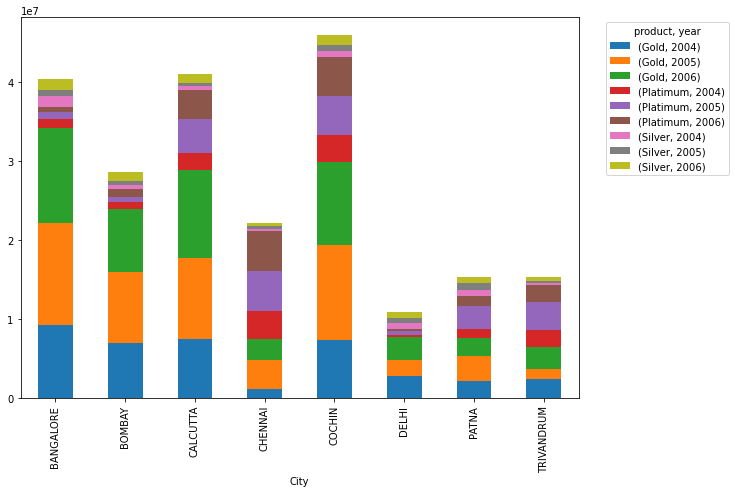

In [204]:
#plotted a stacked bar graph 

q3_df1.plot(kind='bar', stacked=True, figsize=(10,7))
plt.legend( title='product, year', bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

### 4. Create graphs for
### a. Monthly comparison of total spends, city wise

In [205]:
summ = q1_df.pivot_table( index=[q1_df.Month.dt.month,q1_df.Month.dt.month_name()], columns='City', values='Amount', aggfunc='sum')
summ

,City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
Month,Month,,,,,,,,
1,January,9041796.84,5948993.33,9064864.90,4466961.36,11714373.54,2714261.45,4916205.55,3704336.99
2,February,6734494.76,4276988.30,8150545.61,4385815.95,5747886.38,1494064.06,2353333.55,2857123.89
3,March,5362903.07,5227850.50,4939040.04,3183643.71,5645146.53,2267149.02,1437166.61,2392316.51
4,April,4207980.48,1873785.01,3457507.95,2518656.99,3882744.94,777240.75,2338179.53,1199293.45
5,May,6383115.13,3891945.60,5578246.87,2856199.62,6581085.69,1600322.07,2136586.80,2813534.48
6,June,1330685.90,1172594.97,2293045.81,1244242.16,2495745.07,511276.09,746186.13,400336.83
7,July,2228217.69,177726.32,2234573.27,693825.77,1290897.30,50001.50,50000.00,260484.50
8,August,695061.95,1066744.75,1548354.02,305875.97,2317306.61,155402.16,419383.64,453773.94
9,September,703018.28,1278402.79,1511713.57,745759.40,1382242.90,50001.00,70329.95,186063.70


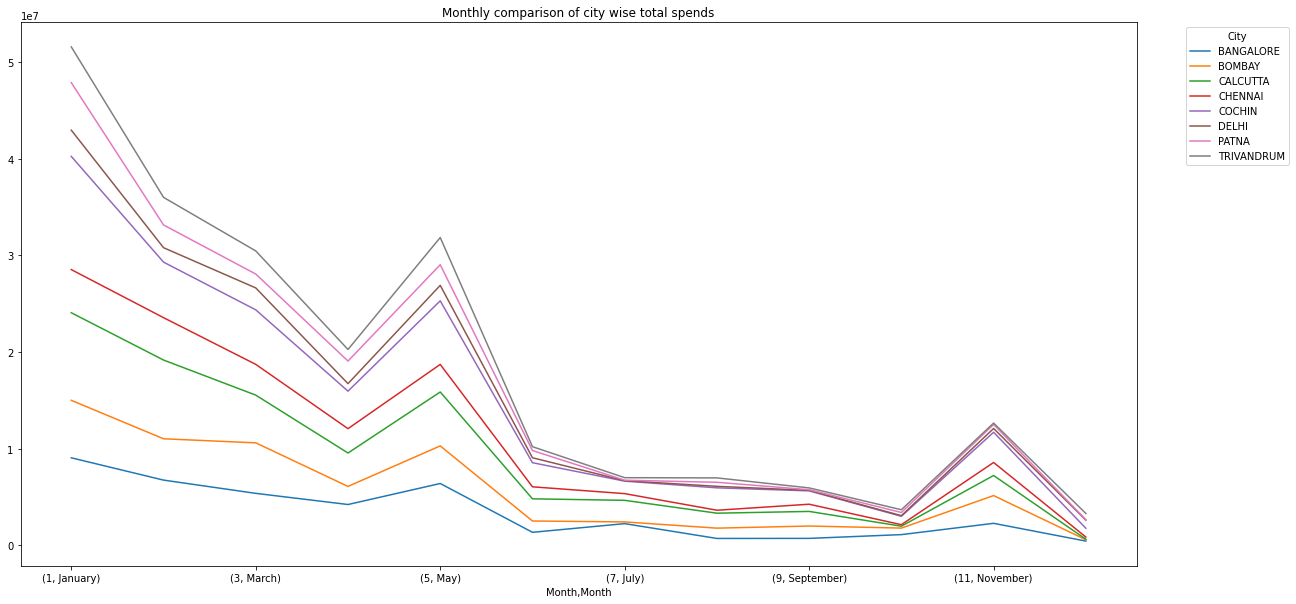

In [206]:
summ.plot(kind='line', stacked=True, title='Monthly comparison of city wise total spends', figsize=(20,10))
plt.legend( title='City', bbox_to_anchor=(1.04, 1), loc="upper left")
plt.legend( title='City', bbox_to_anchor=(1.04, 1), loc="upper left")

<AxesSubplot:xlabel='City,Month,Month'>

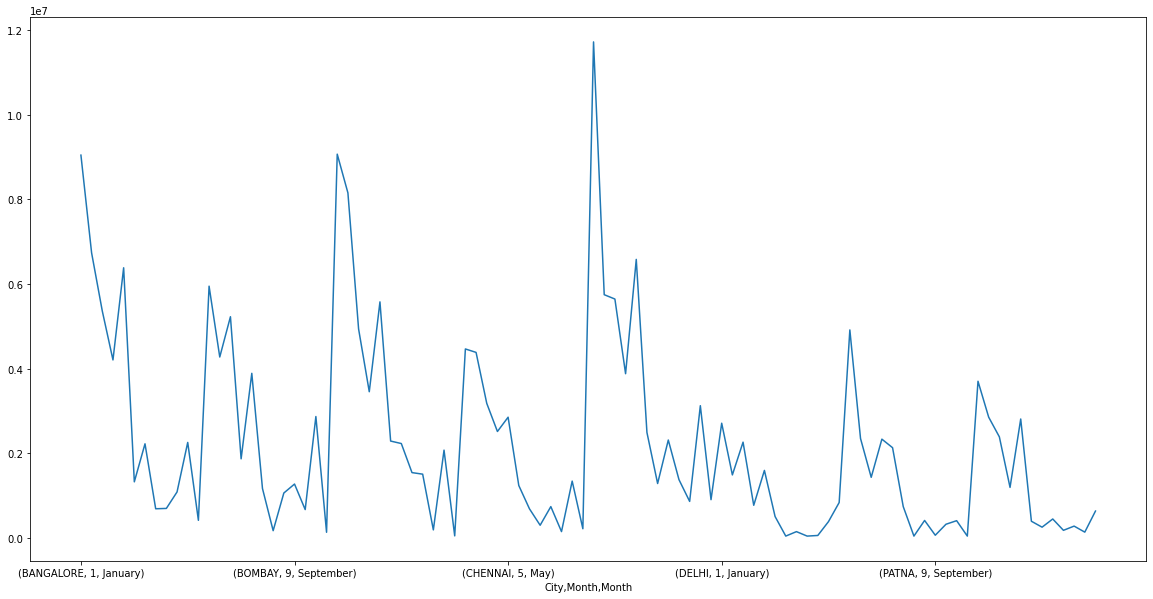

In [207]:
plt.figure(figsize=(20,10))
q1_df.groupby(['City', q1_df.Month.dt.month,q1_df.Month.dt.month_name() ])['Amount'].sum().plot()

###  b. Comparison of yearly spend on air tickets

<AxesSubplot:xlabel='Month'>

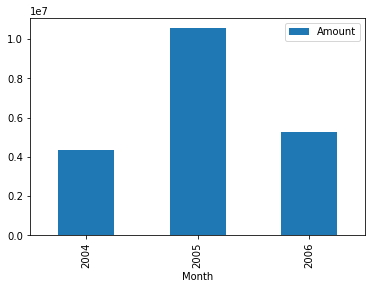

In [208]:
q4b_df=q1_df.groupby([q1_df.Month.dt.year,'Type'])['Amount'].sum().reset_index()
q4b_df[q4b_df.Type=='AIR TICKET'].plot(x='Month', y='Amount', kind='bar')


### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

Text(0.5, 0, 'Month')

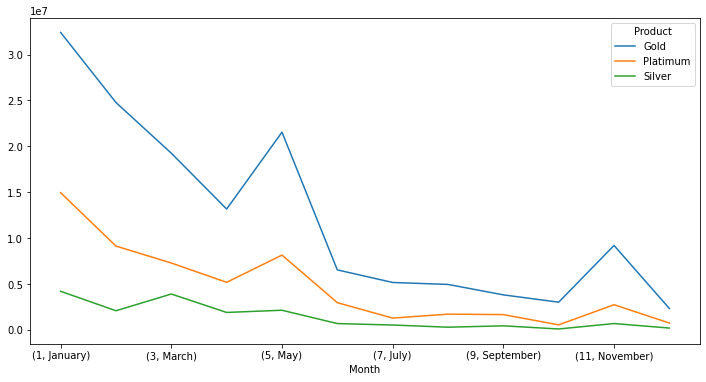

In [209]:
q4c_df=q1_df.groupby([q1_df.Month.dt.month,q1_df.Month.dt.month_name(),'Product'])['Amount'].sum()
q4c_df.index.names=['Month No', 'Month', 'Product']
q4c_df=q4c_df.reset_index()
q4c_df
qc4_pivot=q4c_df.pivot_table(index=['Month No', 'Month'], columns='Product', values='Amount', aggfunc=sum).plot(figsize=(12,6))
plt.xlabel('Month')

### 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [295]:
#step 1= create a df with the product, month and year with repayment as left table

q1_df2['Month name']=pd.Series(q1_df2.Month.dt.month_name())
q1_df2['Year']=pd.Series(q1_df2.Month.dt.year)
q1_df2.head()

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment,_merge,Month name,Year
0,1,A1,2004-01-12,485470.80,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,both,January,2004
1,2,A1,2004-01-03,410556.13,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,both,January,2004
2,3,A1,2004-01-15,23740.46,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,both,January,2004
3,4,A1,2004-01-25,484342.47,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,both,January,2004
4,5,A1,2005-01-17,369694.07,1,76,BANGALORE,Gold,500000.0,C1,Self Employed,both,January,2005


In [311]:
def top10Customers(product_category,time_period):
    product_category=product_category.capitalize()
    time_period=time_period.capitalize()
    if time_period=='Yearly':
        time_period='Year'
    elif time_period=='Monthly':
        time_period='Month name'
    return q1_df2[(q1_df2.Product == product_category)].groupby(['Product',time_period,'City','Customer']).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [325]:
product_category=str(input("Enter Product Category and product category should be in Gold/Silver/Platinum:  "))
time_period=str(input("Enter Time Period and time period should be in yearly/monthly: "))

Enter Product Category and product category should be in Gold/Silver/Platinum:  silver
Enter Time Period and time period should be in yearly/monthly: yearly


In [326]:
top10Customers(product_category,time_period)

,Product,Year,City,Customer,Amount
22,Silver,2005,BOMBAY,A22,1150000.00
33,Silver,2005,PATNA,A46,1119186.72
31,Silver,2005,DELHI,A24,1100022.00
48,Silver,2006,COCHIN,A25,1000030.00
19,Silver,2005,BANGALORE,A23,1000010.00
16,Silver,2004,TRIVANDRUM,A57,1000010.00
4,Silver,2004,BOMBAY,A22,1000000.00
40,Silver,2006,BOMBAY,A22,900000.00
53,Silver,2006,PATNA,A46,853907.13
37,Silver,2006,BANGALORE,A23,852473.01
